<a href="https://colab.research.google.com/github/abinayasree/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=3fef7ebf6bebd85fecf2e97767ae9d4e59858b9adef5aae2b7acc6378fe07640
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("/content/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
1,2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600
2,2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
3,2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000
4,2021-11-05,663.969971,665.640015,645.010010,645.719971,645.719971,5283500


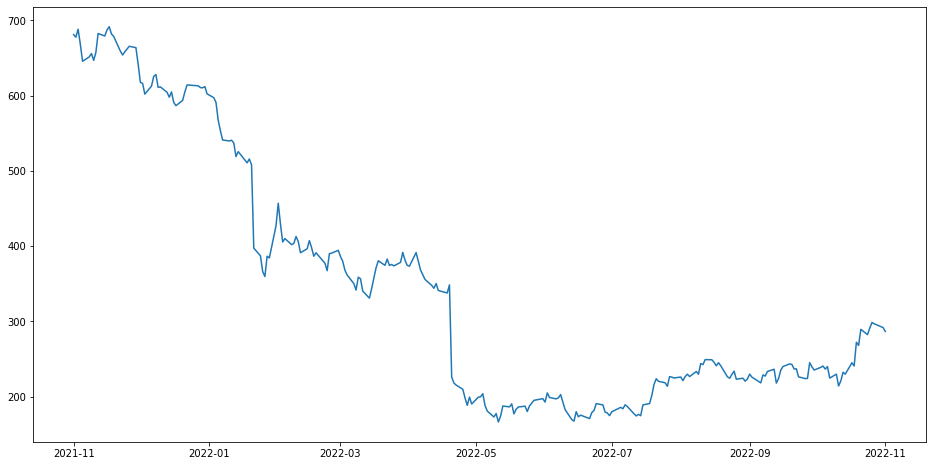

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [ ]:
new_dataset.index=new_dataset.Date
new_dataset.drop(["Date"],axis=1,inplace=True)
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]
#new_dataset.index=new_dataset.Date
#new_dataset.drop(["Date"],axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# CODE 2

In [ ]:
import pandas as pd
stock_data = pd.read_csv('/content/NFLX.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600
2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000
2021-11-05,663.969971,665.640015,645.010010,645.719971,645.719971,5283500


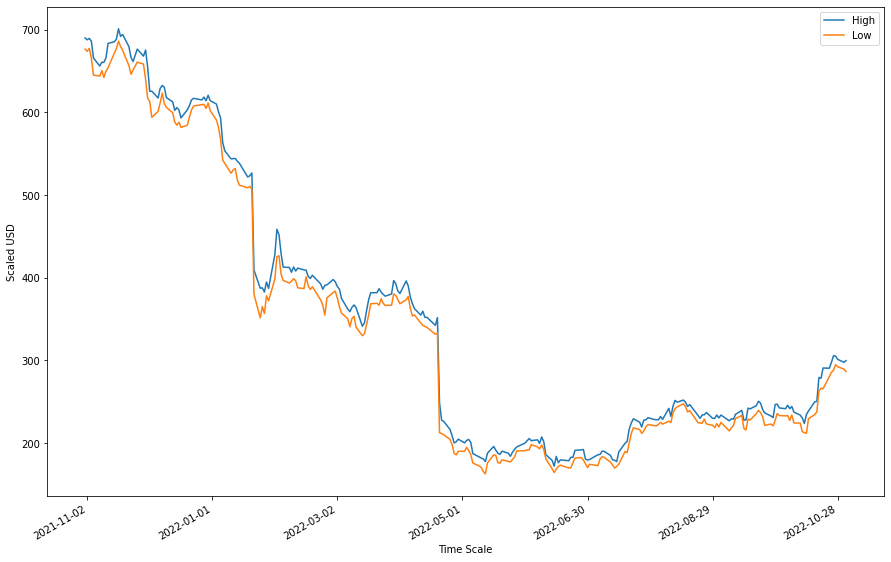

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
 import matplotlib.pyplot as plt
 import pandas as pd
 import numpy as np
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.layers import LSTM
 from tensorflow.keras.layers import Dropout
 from tensorflow.keras.layers import *
 from tensorflow.keras.callbacks import EarlyStopping

 from sklearn.preprocessing import MinMaxScaler, StandardScaler
 from sklearn. metrics import mean_squared_error
 from sklearn.metrics import mean_absolute_percentage_error
 from sklearn.model_selection import train_test_split
 from sklearn.model_selection import TimeSeriesSplit
 from sklearn.metrics import mean_squared_error

In [ ]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:, 0:3]

In [ ]:
#Feature scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns, data=X_ft, index=X_feat.index)

In [ ]:
def lstm_split(data, n_steps):
  X, y = [], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i + n_steps, -1])
    y.append(data[i + n_steps-1, -1])
  return np.array(X), np.array(y)

In [ ]:
X1, y1= lstm_split(stock_data.values, n_steps=2)

train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index = stock_data.index

X_train, X_test = X1[:split_idx], X1[split_idx:] 
y_train, y_test = y1[:split_idx], y1[split_idx:] 
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(252, 2) (202, 2) (50, 2) (50,)


In [ ]:
x_shape = X_train.shape[1]

In [ ]:
from numpy import newaxis
X_train = X_train[:, :, newaxis]

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error', metrics = ['accuracy'])
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
7/7 [==============================] - 9s 13ms/step - loss: 228638205149184.0000 - accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 228638188371968.0000 - accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 228638154817536.0000 - accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 228638104485888.0000 - accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 228638037377024.0000 - accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 228638020599808.0000 - accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 228637987045376.0000 - accuracy: 0.0000e+00
Epoch 8/50
7/7 [==============================] - 0s 15ms/step - loss: 228637987045376.0000 - accuracy: 0.0000e+00
Epoch 9/50
7/7 [==============================] - 0s 13ms/step - loss: 22863798704

In [ ]:
lstm.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
7/7 [==============================] - 2s 6ms/step - loss: 200493938769920.0000 - accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 190711798431744.0000 - accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 182106714013696.0000 - accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 170755484549120.0000 - accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 162870092365824.0000 - accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 155227114176512.0000 - accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 149147285979136.0000 - accuracy: 0.0000e+00
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 142412441714688.0000 - accuracy: 0.0000e+00
Epoch 9/50
7/7 [==============================] - 0s 6ms/step - loss: 134771611009024.00